In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading datasets
#train data and test data
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

In [4]:
#Viewing data and different features
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

**Removing useless data from the data set such as 'Name','Ticket','Cabin','PassengerId'**

In [7]:
df=train.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
# identifying categorical and continuous variables

df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

**Categorical variables are stored as objects and continuous variables are stored as int or float therefore name, sex and ticket are categorical variables**

> **UNIVARIATE ANALYSIS OF CONTINUOS VARIABLES**

In [9]:
# using describe func on the continuos variabes ( only works for continuos variables)

df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

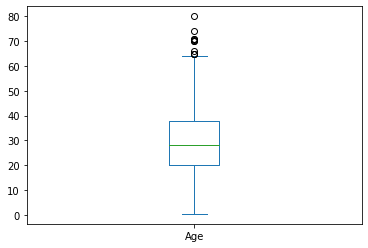

In [10]:
# plotting a boxplot of the age variable

df['Age'].plot.box()

> **UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES**

In [11]:
# creating frequence table for sex variable

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

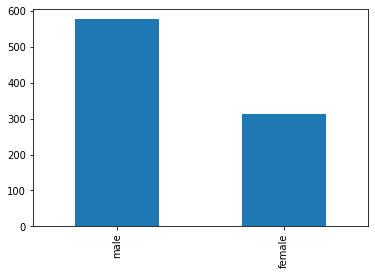

In [12]:
# creating a bar plt for the same

df['Sex'].value_counts().plot.bar()

**BIVARIATE ANALYSIS**

<AxesSubplot:xlabel='Age', ylabel='Fare'>

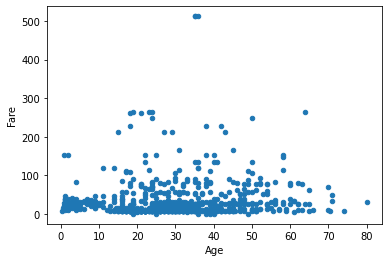

In [13]:
# using scatter plot to compare age and fare

df.plot.scatter('Age', 'Fare')

**CHECKING FOR MISSING VALUES**

In [14]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**OUTLIER TREATMENT**

<AxesSubplot:>

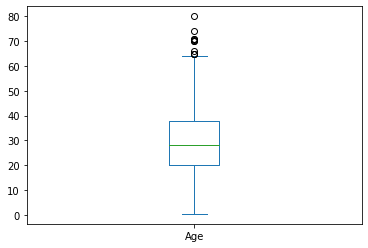

In [15]:
# UNIVARIATE OUTLIER DETECTION USING BOX PLOT

df['Age'].plot.box()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

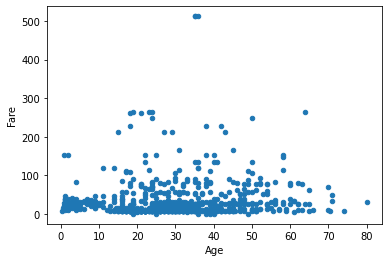

In [16]:
# BIVARIATE OUTLIER DETECTION USING SCATTER PLOT

df.plot.scatter('Age', 'Fare')

In [17]:
# Treating outliers

#removing fare outliers from dataset

df = df[df['Fare']<300]

In [18]:
#replacing outliers in age with the mean age value

df['Age'].fillna(df['Age'].mean(), inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
# Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times

print(df['Embarked'].mode())

0    S
dtype: object


In [20]:
# replacing with mode

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [21]:
# checking again
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    object 
 3   Age       888 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  888 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.4+ KB


**Encoding Categorical Data**

In [23]:
#Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1
df = pd.get_dummies(df, columns=["Sex", "Embarked"])

# **Splitting data into Test set & Training Set**
1.Clean and adjust data for X and y

2.Split Data in Train/Test for X and y

3.Fit/Train Scaler on Training X

4.Scale X

5.Create Model

6.Fit/Train Model on X Train

7.Evaluate Model on X Test by comparing to Y Test

8.Adjust Parameters as Necessary and repeat 6 and 7

In [24]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [25]:
# Split Data in Train/Test for X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [26]:
# Fit/Train Scaler on Training X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [27]:
# Scale X
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**01. Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = logreg.predict(X_test)

In [30]:
# Model Performance Evaluation for Logistic Regression

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.26699766355140175

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8239700374531835

**02. Multiple Linear Regression model**

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [33]:
# Model Performance Evaluation for Linear Regression

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.43716166155312597

**03. Support Vector Regression**

In [34]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [35]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [36]:
# Model Performance Evaluation for Support Vector Regression
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.40042926901542997

**TEST DATA SET**

In [37]:
df1=test

In [38]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Fare'>

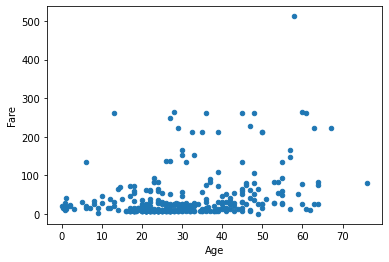

In [40]:
df1.plot.scatter('Age', 'Fare')

In [41]:
#removing fare outliers from dataset

df1 = df1[df1['Fare']<300]

<AxesSubplot:xlabel='Age', ylabel='Fare'>

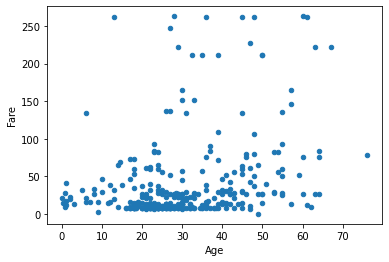

In [42]:
#checking
df1.plot.scatter('Age', 'Fare')

In [43]:
#replacing outliers in age with the mean age value

df1['Age'].fillna(df1['Age'].mean(), inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [44]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [45]:
# dropping useless columns 
df1.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [47]:
#Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1
df1 = pd.get_dummies(df1, columns=["Sex", "Embarked"])

In [48]:
df1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [49]:
df1.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      416 non-null    int64  
 1   Age         416 non-null    float64
 2   SibSp       416 non-null    int64  
 3   Parch       416 non-null    int64  
 4   Fare        416 non-null    float64
 5   Sex_female  416 non-null    uint8  
 6   Sex_male    416 non-null    uint8  
 7   Embarked_C  416 non-null    uint8  
 8   Embarked_Q  416 non-null    uint8  
 9   Embarked_S  416 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 21.5 KB


In [51]:
df1.shape

(416, 10)

**Prediction**

In [52]:
prediction=logreg.predict(df1)  #name of logistic regression model (logreg)


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [53]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [54]:
test=pd.read_csv('../input/titanic/test.csv')